In [64]:
import pandas as pd
import numpy as np

df = pd.read_csv("Raw Data.csv")
df.head()
#df.info()
df['Linear Acceleration x (m/s^2)']

0       0.528280
1       0.269437
2       0.282094
3       0.521183
4       0.746057
          ...   
8763   -0.227917
8764   -0.208667
8765    0.007083
8766   -0.147959
8767   -0.088510
Name: Linear Acceleration x (m/s^2), Length: 8768, dtype: float64

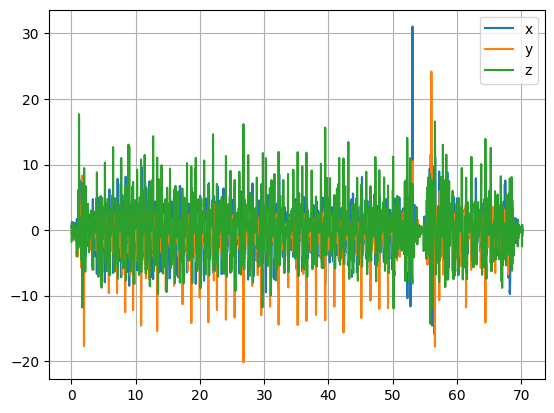

In [65]:
import matplotlib.pyplot as plt
plt.plot(df['Time (s)'],df['Linear Acceleration x (m/s^2)'])
plt.plot(df['Time (s)'],df['Linear Acceleration y (m/s^2)'])
plt.plot(df['Time (s)'],df['Linear Acceleration z (m/s^2)'])
plt.legend(['x','y','z'])
plt.grid()
plt.show()

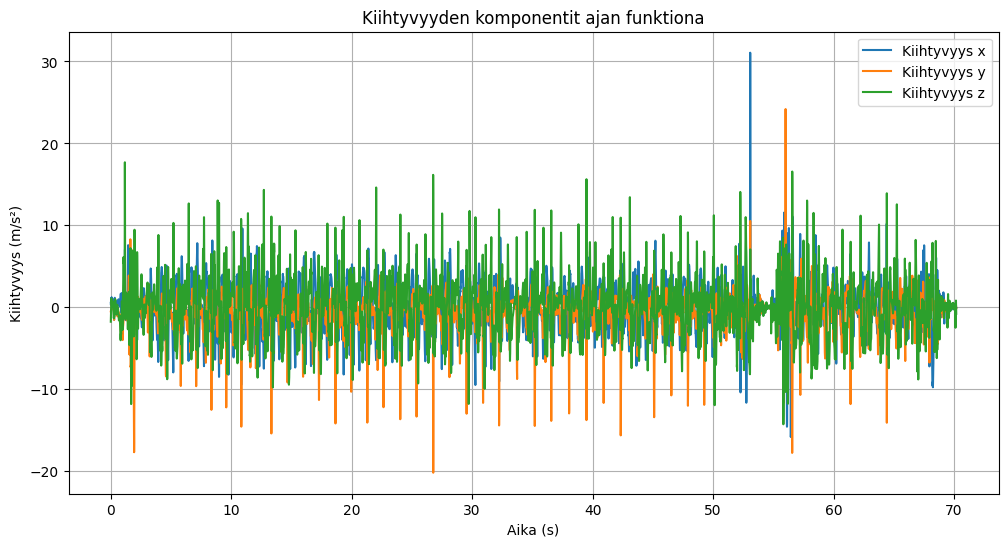

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(df['Time (s)'], df['Linear Acceleration x (m/s^2)'], label='Kiihtyvyys x')
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'], label='Kiihtyvyys y')
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'], label='Kiihtyvyys z')
plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s²)')
plt.title('Kiihtyvyyden komponentit ajan funktiona')
plt.legend()
plt.grid()
plt.show()

In [67]:
acceleration = df['Linear Acceleration z (m/s^2)']
time = df['Time (s)']
total_steps = 80
total_time = df['Time (s)'].iloc[-1] - df['Time (s)'].iloc[0]
step_frequency = total_steps / total_time
print(f"Askeltaajuus: {step_frequency:.2f} Hz")

Askeltaajuus: 1.14 Hz


In [68]:
from scipy.signal import butter, filtfilt

fs = 1 / np.mean(np.diff(time))

lowcut = step_frequency - 0.5
highcut = step_frequency + 0.5

lowcut = max(lowcut, 0.1)
highcut = min(highcut, fs / 2 - 0.1)

nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

order = 4
b, a = butter(order, [low, high], btype='band')

filtered_acceleration = filtfilt(b, a, acceleration)